In [33]:
import ultralytics
from IPython.display import display, Image
from roboflow import Roboflow
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt

# Set the device for GPU acceleration
#device = "cuda"

ultralytics.checks()

# Set the first_run flag to False after the initial run
first_run = False

if first_run:
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

Ultralytics 8.3.143  Python-3.9.18 torch-2.3.1+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
Setup complete  (12 CPUs, 7.4 GB RAM, 280.8/369.6 GB disk)


In [34]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

results = model.predict(source='images/bowl/1.jpg', conf=0.55)
for result in results:
    boxes = result.boxes
bbox = boxes.xyxy.tolist()[0]
print(bbox)


image 1/1 C:\Users\Amit\Downloads\23rd_may_2025\images\bowl\1.jpg: 448x640 1 bowl, 324.9ms
Speed: 23.4ms preprocess, 324.9ms inference, 23.3ms postprocess per image at shape (1, 3, 448, 640)
[2276.13623046875, 1527.4970703125, 4346.09619140625, 2420.443359375]


In [35]:
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
image = cv2.cvtColor(cv2.imread('images/bowl/1.jpg'), cv2.COLOR_BGR2RGB)
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
#sam.to(device=device)
predictor = SamPredictor(sam)
predictor.set_image(image)

In [36]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [37]:
input_box = np.array(bbox)
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

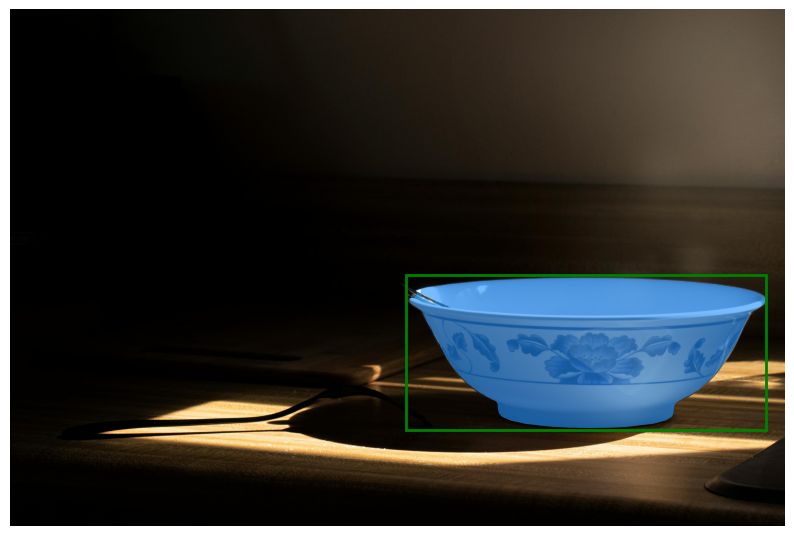

In [38]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')

plt.show()


In [40]:
import cv2
import numpy as np

output_img = image.copy()
output_img = cv2.cvtColor(output_img, cv2.COLOR_RGB2BGR)

mask = masks[0]  # binary mask
colored_mask = np.zeros_like(output_img)
colored_mask[mask] =[255, 255, 255]# [0, 0, 255]#--- red mask #[0, 255, 0]  # green mask

alpha = 0.5  # transparency
output_img = cv2.addWeighted(output_img, 1, colored_mask, alpha, 0)

x1, y1, x2, y2 = map(int, input_box)
cv2.rectangle(output_img, (x1, y1), (x2, y2), (0, 0, 255), 10)

cv2.imwrite("masked_Bowl_result_white.jpg", output_img)


True

In [41]:
##-------------- bottle detection & Segmentation ---------------------------


import ultralytics
from IPython.display import display, Image
from roboflow import Roboflow
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt

# Check Ultralytics version and setup completion
ultralytics.checks()

# Set the first_run flag to False after the initial run
first_run = False

if first_run:
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

Ultralytics 8.3.143  Python-3.9.18 torch-2.3.1+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
Setup complete  (12 CPUs, 7.4 GB RAM, 284.4/369.6 GB disk)


In [46]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

results = model.predict(source='images/bottle/9.jpg', conf=0.55)
for result in results:
    boxes = result.boxes
bbox = boxes.xyxy.tolist()[0]
print(bbox)


image 1/1 C:\Users\Amit\Downloads\23rd_may_2025\images\bottle\9.jpg: 640x448 1 bottle, 1 dining table, 208.4ms
Speed: 18.1ms preprocess, 208.4ms inference, 21.5ms postprocess per image at shape (1, 3, 640, 448)
[1901.865478515625, 2277.2080078125, 2759.084716796875, 4840.39013671875]


In [47]:
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
image = cv2.cvtColor(cv2.imread('images/bottle/9.jpg'), cv2.COLOR_BGR2RGB)
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
#sam.to(device=device)
predictor = SamPredictor(sam)
predictor.set_image(image)

In [48]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

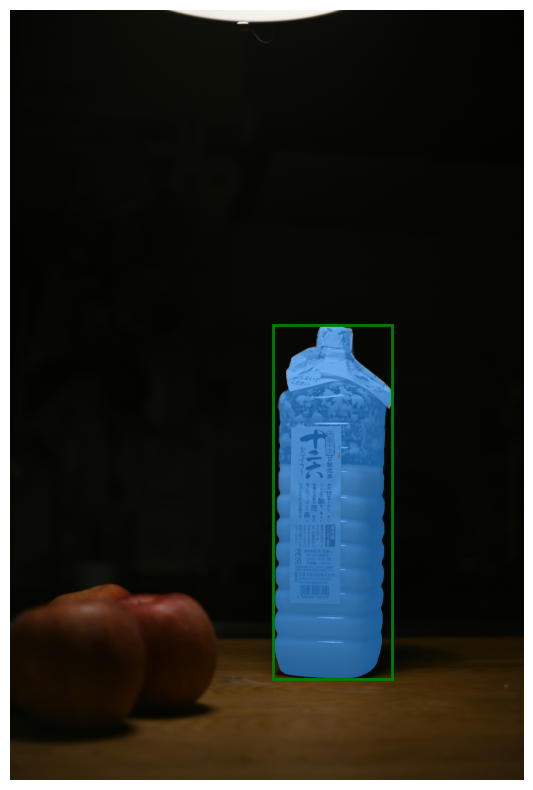

In [49]:
input_box = np.array(bbox)
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')

plt.show()

In [50]:
import cv2
import numpy as np

# 1. Original image (RGB to BGR for OpenCV)
output_img = image.copy()
output_img = cv2.cvtColor(output_img, cv2.COLOR_RGB2BGR)

# 2. Overlay mask
mask = masks[0]  # binary mask
colored_mask = np.zeros_like(output_img)
colored_mask[mask] =[255, 255, 255]# [0, 0, 255]#--- red mask #[0, 255, 0]  # green mask

# Blend mask over image
alpha = 0.5  # transparency
output_img = cv2.addWeighted(output_img, 1, colored_mask, alpha, 0)

# 3. Draw bounding box
x1, y1, x2, y2 = map(int, input_box)
cv2.rectangle(output_img, (x1, y1), (x2, y2), (0, 0, 255), 10)

# 4. Save result
cv2.imwrite("masked_bottle_result_white.jpg", output_img)
print('Masked object saved.')

Masked object saved.
